## Lab | Random variable distributions

Refer to the `files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv` dataset.

### Instructions

1. Get the numerical variables from our dataset.
2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.
3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
data = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
data.head(2)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [5]:
data.columns = data.columns.str.replace(' ', '_').str.lower()
data.head(2)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [10]:
numerical_df = data.select_dtypes('number')
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


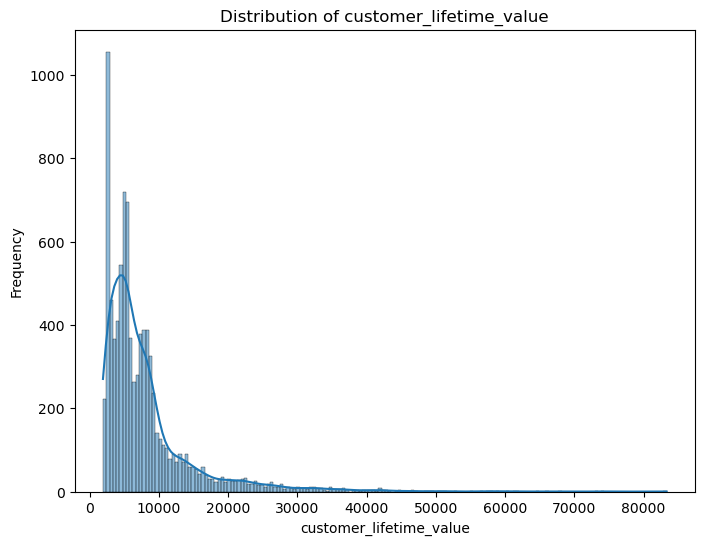

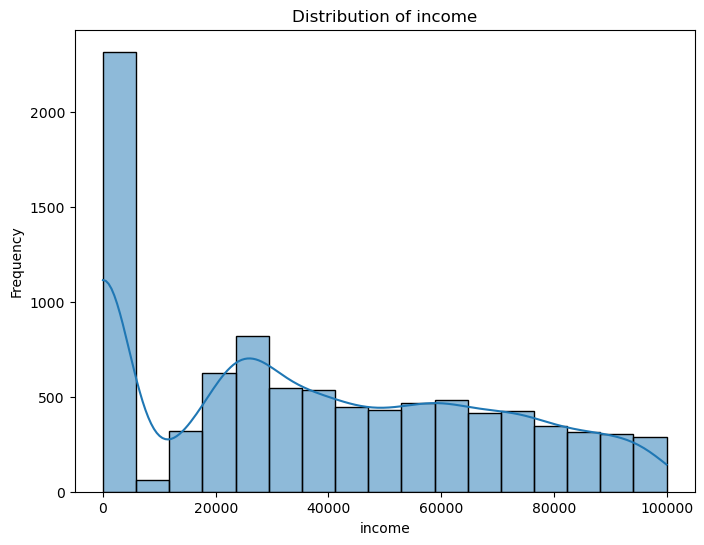

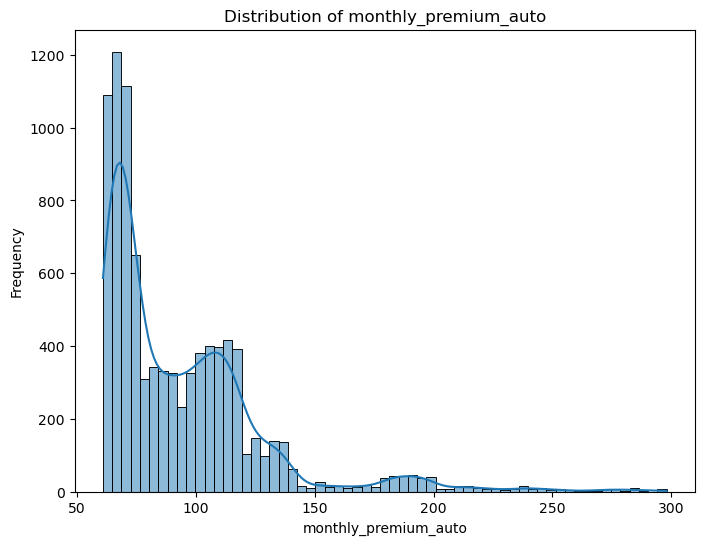

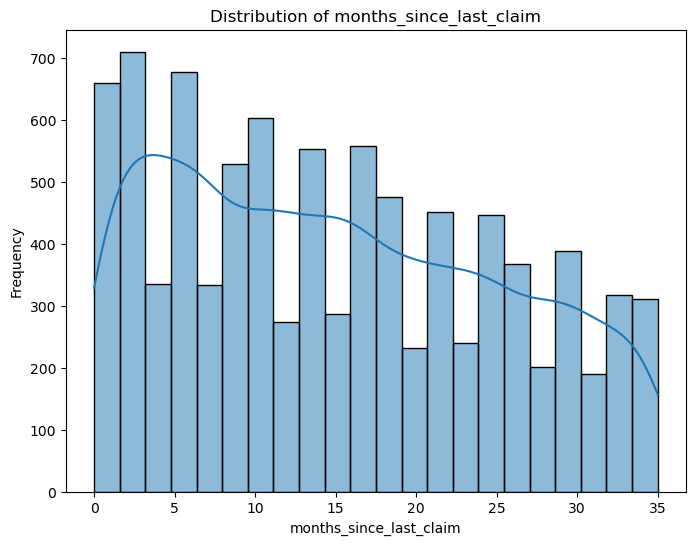

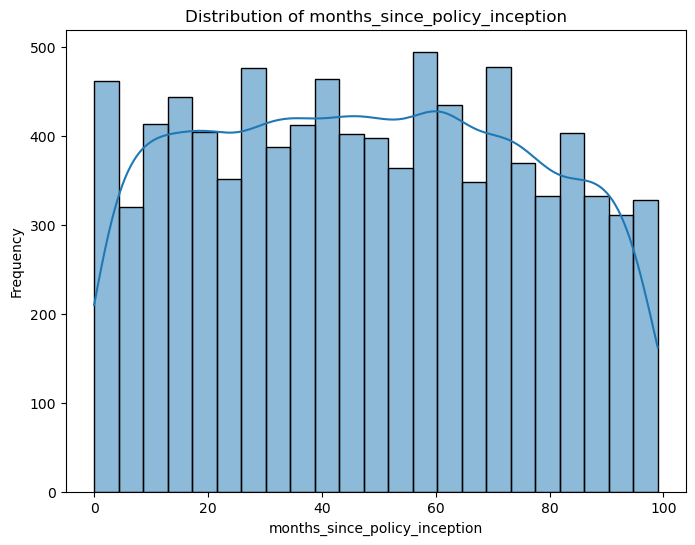

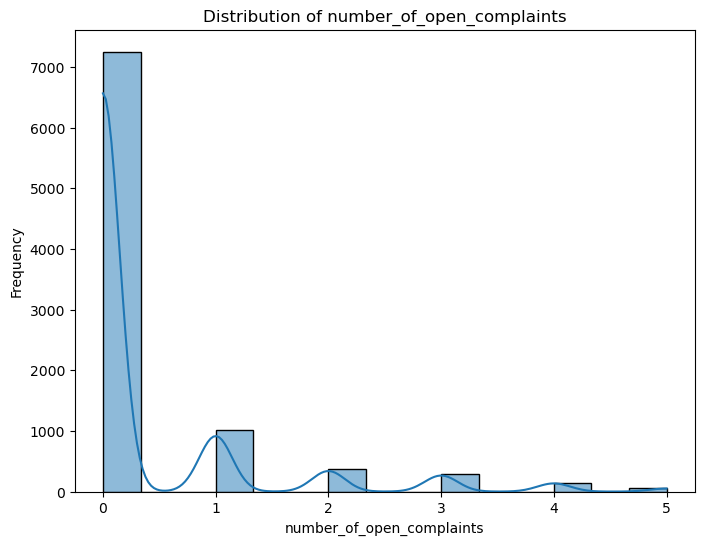

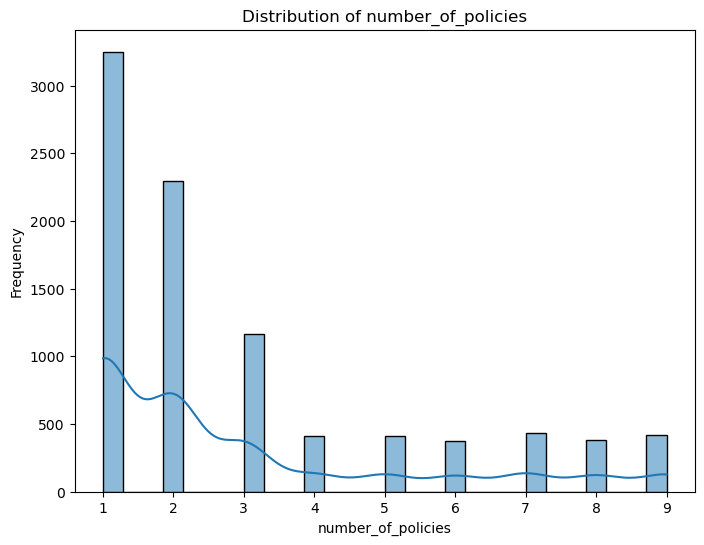

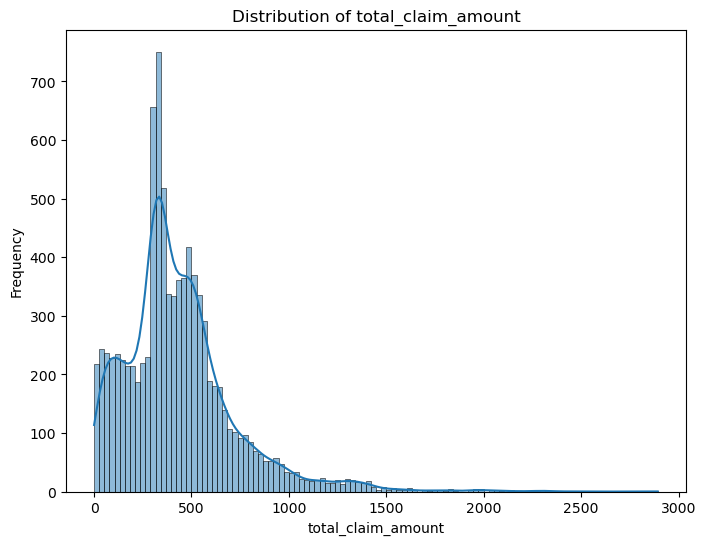

In [33]:
for column in numerical_df.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data= numerical_df, x=numerical_df[column], kde=True)
    
    # Remember: by prefixing a string with the letter 'f' ("f-string" or "formatted string literal"),
    # you can include expressions within curly braces {} inside the string, and those expressions will be evaluated 
    # and replaced with their values.
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [29]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True)
numerical_pt = pt.fit_transform(numerical_df)
numerical_pt_df = pd.DataFrame(numerical_pt, columns=numerical_df.columns)
numerical_pt_df.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,-1.394947,0.691719,-0.850901,1.464556,-1.716791,-0.509289,-1.145850,0.006373
1,0.271651,-1.641026,0.433173,-0.040371,-0.113063,-0.509289,1.577821,1.988152
2,1.114847,0.596805,0.847014,0.416410,-0.255772,-0.509289,-0.058430,0.604891


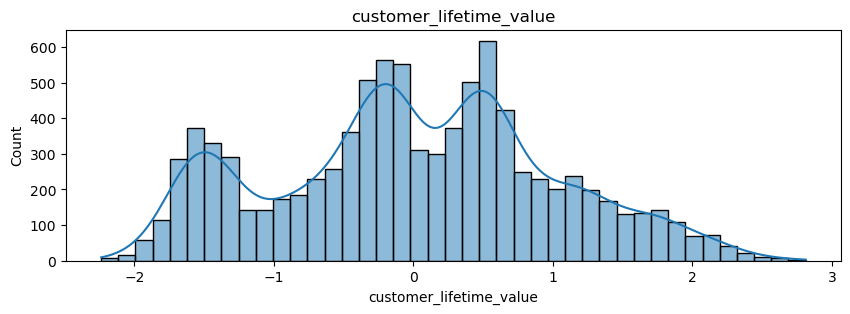

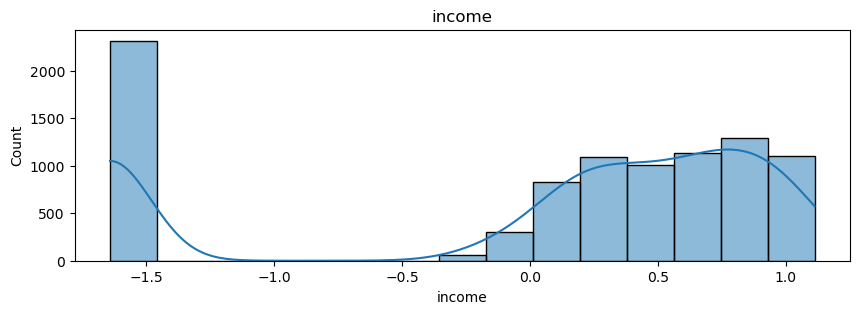

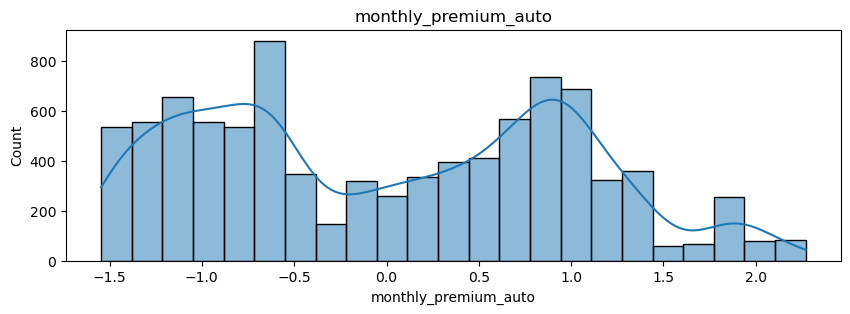

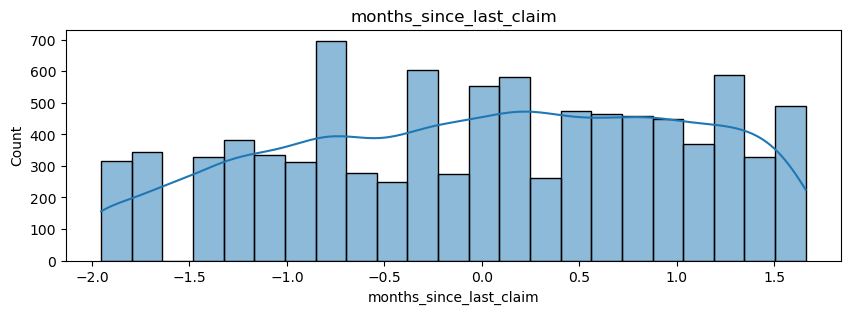

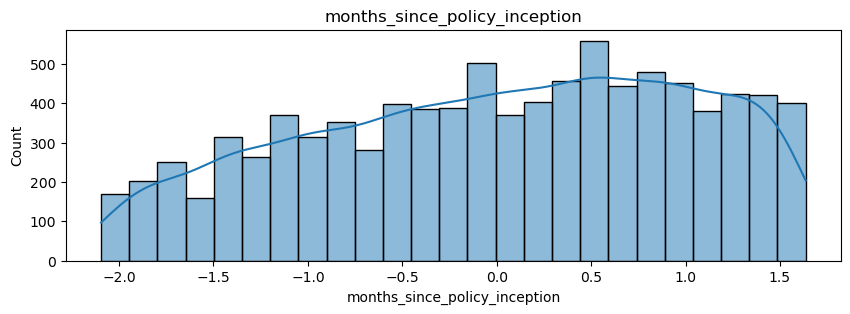

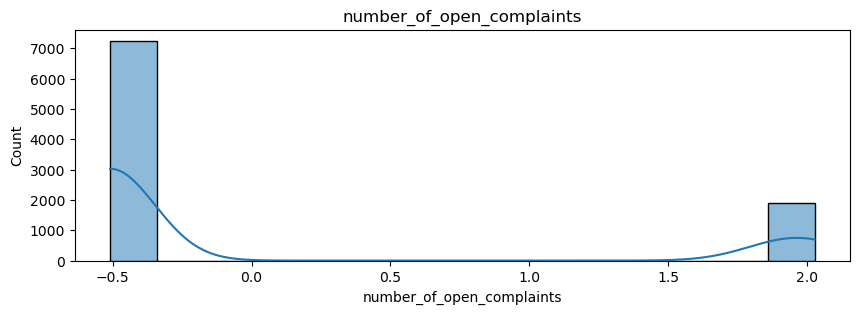

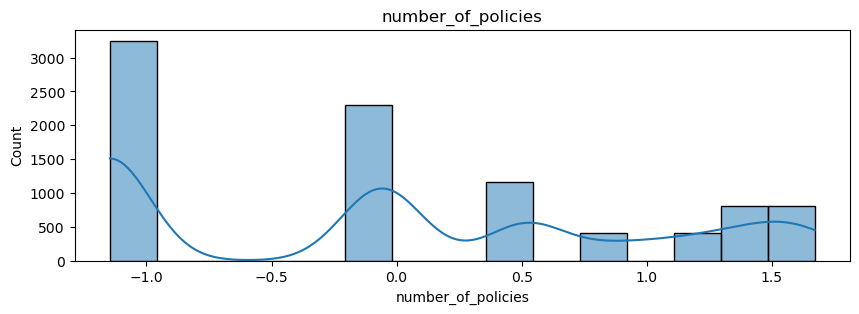

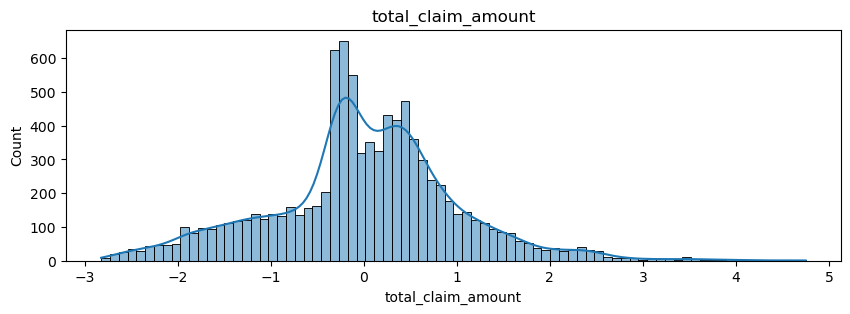

In [30]:
for column in numerical_pt_df.columns:
    plt.figure(figsize=(10,3))
    sns.histplot(numerical_pt_df[column], kde=True)
    plt.title(column)
    plt.show()

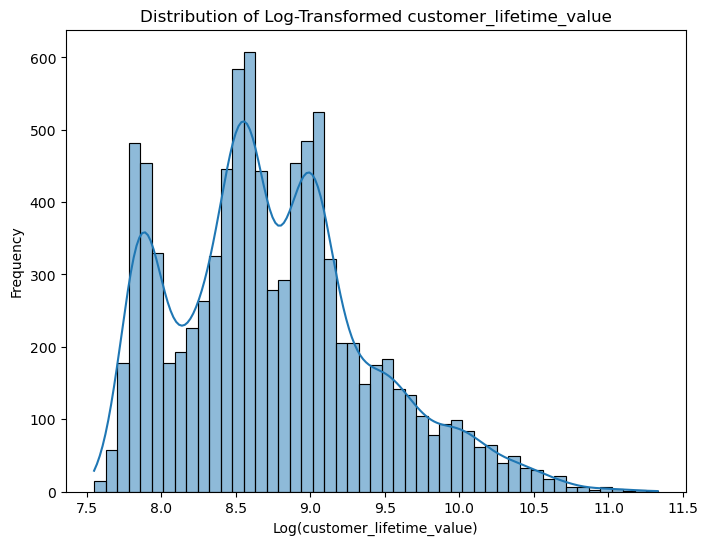

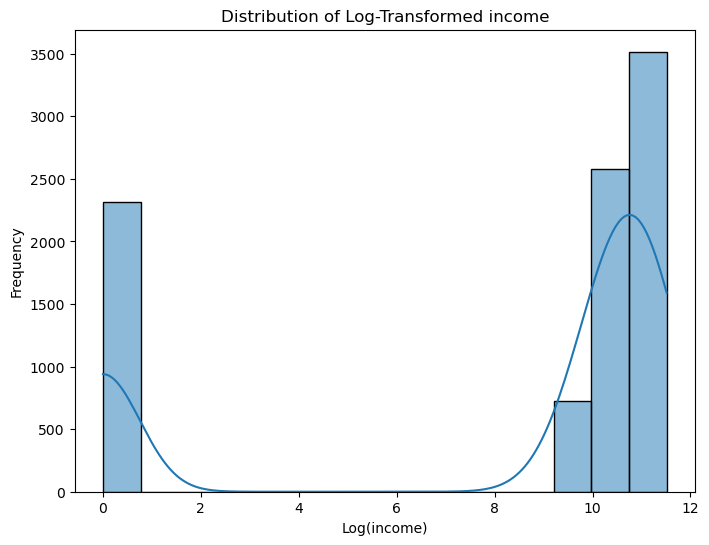

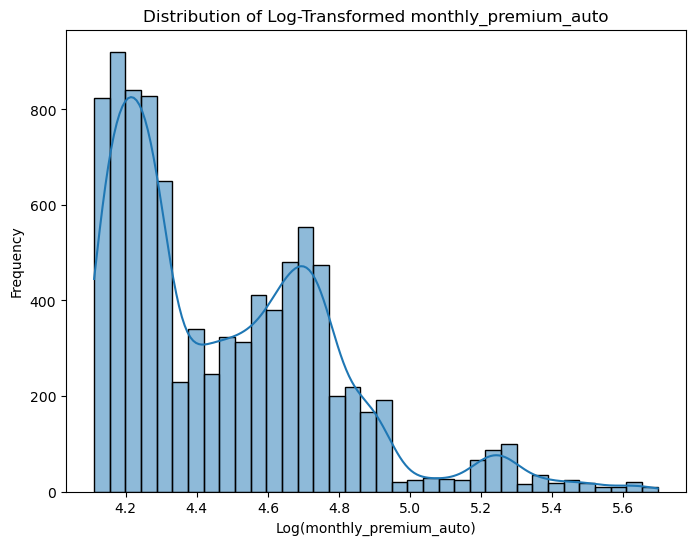

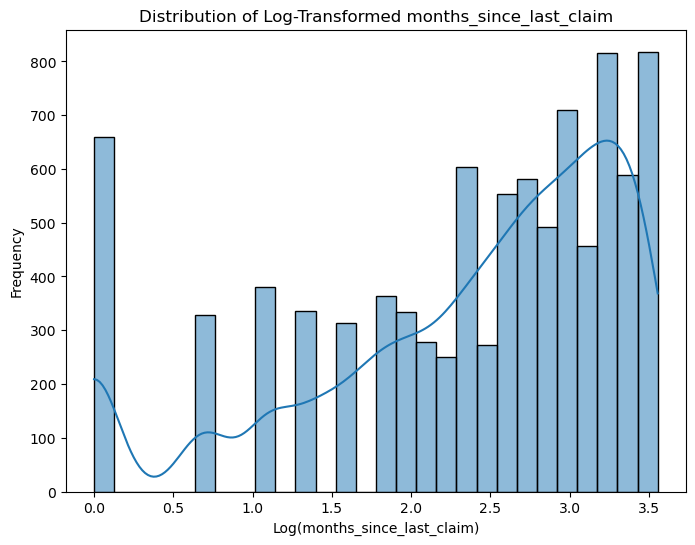

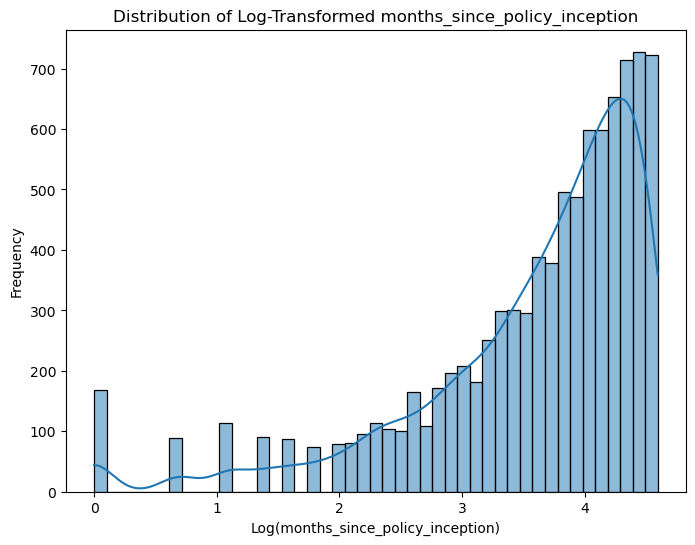

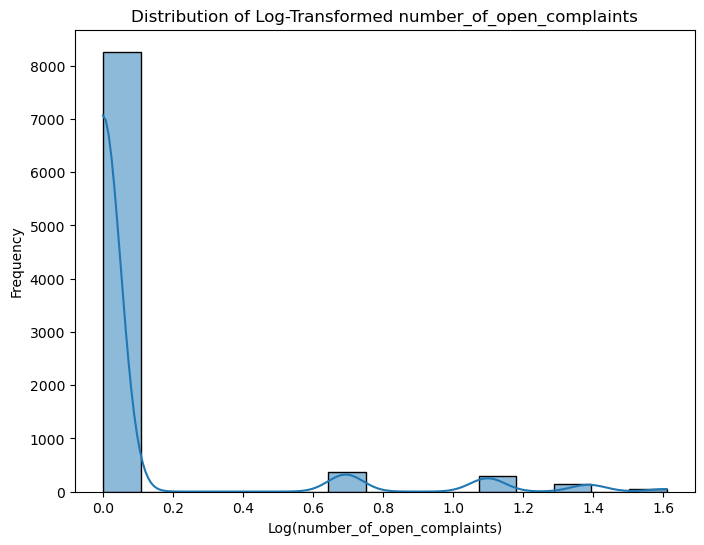

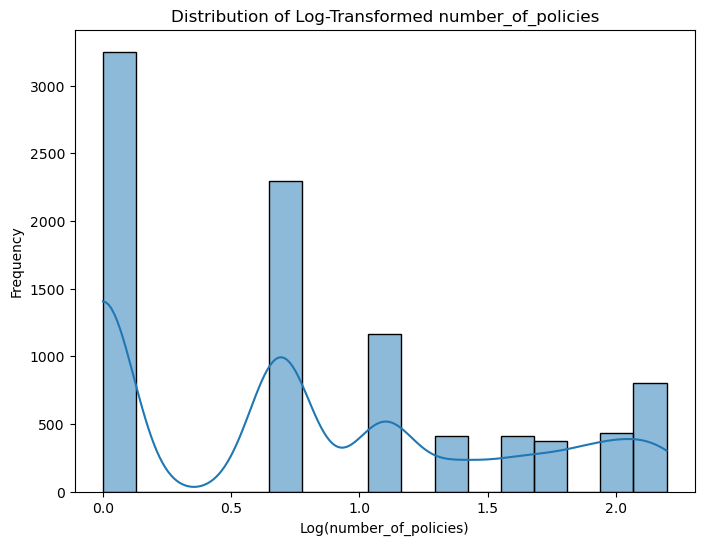

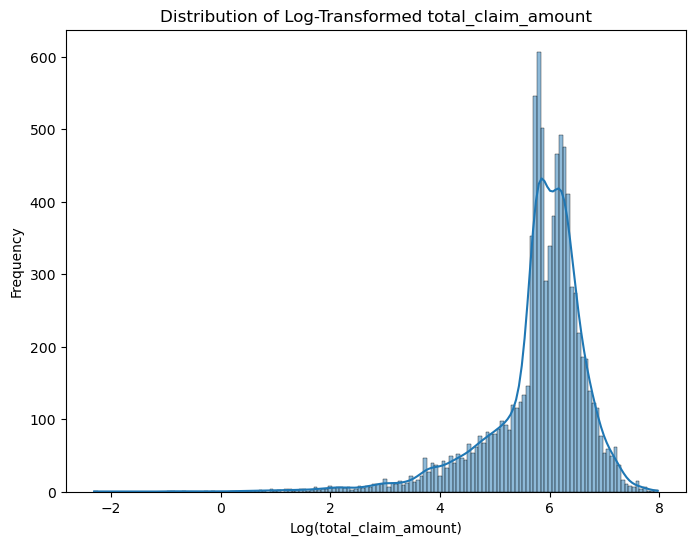

In [34]:
# Apply log-transform to the numerical columns
transformed_columns = []
for column in numerical_df.columns:
    transformed_column = numerical_df[column].apply(lambda x: x if x <= 0 else np.log(x))
    transformed_columns.append(transformed_column)

df_log_transformed = pd.concat(transformed_columns, axis=1)
    
    
# Plot distribution plots for each log-transformed numerical column
for column in df_log_transformed.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df_log_transformed, x=column, kde=True)
    plt.title(f'Distribution of Log-Transformed {column}')
    plt.xlabel(f'Log({column})')
    plt.ylabel('Frequency')
    plt.show()